In [1]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
import utils

In [2]:
tf.__version__

'2.3.0'

In [3]:
keras.__version__

'2.4.0'

In [4]:
# load a dataset
housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)
print(X_train_full.shape, X_train_full.dtype)

(15480, 8) float64


In [5]:
# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [6]:
def architecture():
    model = keras.models.Sequential()
    model.add(keras.layers.Dense(30, activation='relu', input_shape=X_train.shape[1:]))
    model.add(keras.layers.Dense(1))
    return model

def inspect(model):
    print(model.summary())
    print(model.layers)
model = architecture()
inspect(model)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                270       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 31        
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________
None
[<tensorflow.python.keras.layers.core.Dense object at 0x13b1e4df0>, <tensorflow.python.keras.layers.core.Dense object at 0x13b1f9940>]


In [7]:
model.compile(loss=keras.losses.mean_squared_error,
              optimizer=keras.optimizers.SGD(lr=0.01),
              metrics=[keras.metrics.mean_squared_error])

In [8]:
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.0721 - mean_squared_error: 1.0721 - val_loss: 0.5619 - val_mean_squared_error: 0.5619
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5237 - mean_squared_error: 0.5237 - val_loss: 0.4698 - val_mean_squared_error: 0.4698
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4810 - mean_squared_error: 0.4810 - val_loss: 0.4424 - val_mean_squared_error: 0.4424
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4644 - mean_squared_error: 0.4644 - val_loss: 0.4299 - val_mean_squared_error: 0.4299
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4536 - mean_squared_error: 0.4536 - val_loss: 0.4176 - val_mean_squared_error: 0.4176
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4443 - mean_squared_error: 0.4443 - val_loss: 0.4100 - val_mean_squared_error: 0.4100
Epoch 7/20
363/363 [========

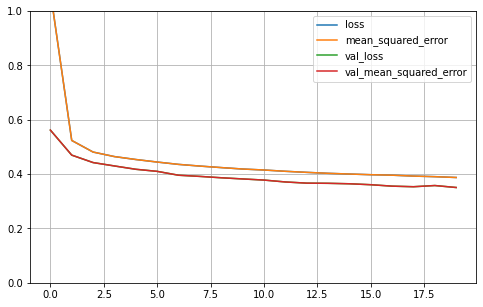

In [9]:
# plot the history
utils.print_history(history)

In [10]:
model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 791us/step - loss: 0.3797 - mean_squared_error: 0.3797


[0.37974244356155396, 0.37974244356155396]

In [11]:
# Use the model to produce inferences
pred = model.predict(X_test[0:1])
pred

array([[2.6340575]], dtype=float32)